In [6]:
!pip install tensorflow
import tensorflow as tf
from tensorflow import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras import optimizers
from keras import losses
from keras import metrics
from keras.utils import to_categorical
import matplotlib.pyplot as plt

In [7]:
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()
train_data = train_data.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_data = test_data.reshape((10000, 28, 28, 1)).astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

4422102/4422102 [==============================] - 0s 0us/step


In [8]:
model = Sequential([ Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)), MaxPooling2D((2, 2)), Conv2D(64, (3, 3), activation='relu'), MaxPooling2D((2, 2)), Flatten(), Dense(128, activation='relu'), Dense(10, activation='sigmoid') ])
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

Epoch 1/15
750/750 [==============================] - 41s 54ms/step - loss: 0.5272 - accuracy: 0.8080 - val_loss: 0.3591 - val_accuracy: 0.8705
Epoch 2/15
750/750 [==============================] - 42s 56ms/step - loss: 0.3335 - accuracy: 0.8790 - val_loss: 0.3405 - val_accuracy: 0.8786
Epoch 3/15
750/750 [==============================] - 40s 54ms/step - loss: 0.2830 - accuracy: 0.8967 - val_loss: 0.2770 - val_accuracy: 0.8999
Epoch 4/15
750/750 [==============================] - 41s 55ms/step - loss: 0.2512 - accuracy: 0.9074 - val_loss: 0.2771 - val_accuracy: 0.9000
Epoch 5/15
750/750 [==============================] - 40s 53ms/step - loss: 0.2232 - accuracy: 0.9185 - val_loss: 0.2602 - val_accuracy: 0.9054
Epoch 6/15
750/750 [==============================] - 40s 54ms/step - loss: 0.2008 - accuracy: 0.9265 - val_loss: 0.2596 - val_accuracy: 0.9080
Epoch 7/15
750/750 [==============================] - 41s 54ms/step - loss: 0.1823 - accuracy: 0.9334 - val_loss: 0.2552 - val_accuracy:

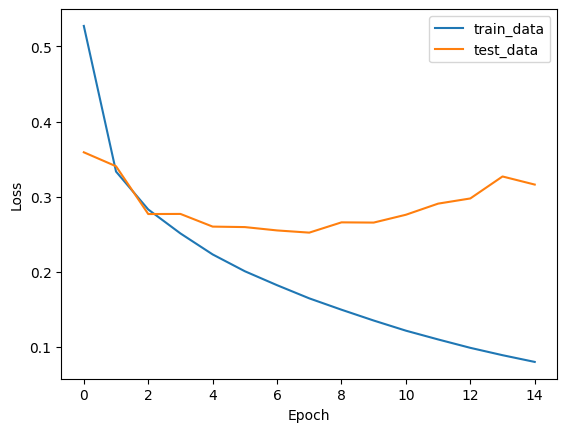

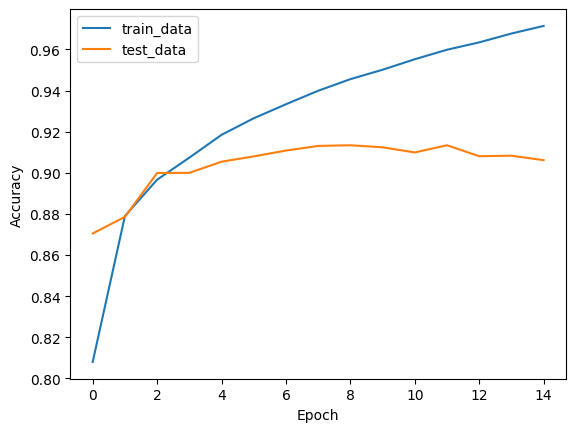

In [9]:
history = model.fit(train_data, train_labels, epochs=15, batch_size=64, validation_split=0.2)
plt.plot(history.history['loss'], label='train_data')
plt.plot(history.history['val_loss'], label='test_data')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
plt.plot(history.history['accuracy'], label='train_data')
plt.plot(history.history['val_accuracy'], label='test_data')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [11]:
test_loss, test_accuracy = model.evaluate(test_data, test_labels)
print(f'Точність на тестовому наборі: {test_accuracy * 100:.2f}%')

313/313 [==============================] - 3s 9ms/step - loss: 0.3284 - accuracy: 0.9060
Точність на тестовому наборі: 90.60%
